#Day5. 데이터분석 개론

---



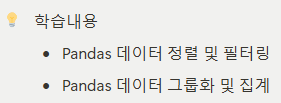

##**Pandas 데이터 정렬 및 필터링**

**Pandas 활용한 그로스 마케팅의 강점**

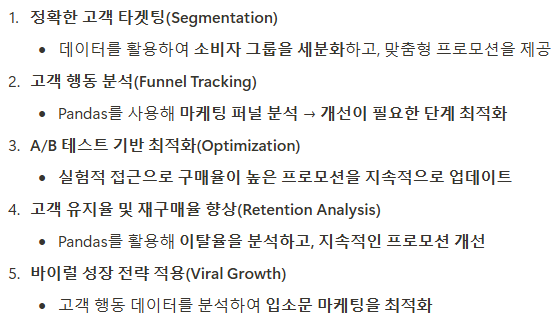



**그로스 마케팅의 핵심 성공 전략**
- image.png



---

##**Pandas 데이터 정렬 (Sorting)**
- 단일 열 기준 정렬
- 여러 열 기준 정렬

### **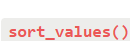 활용한 단일 열 정렬**

In [4]:
import pandas as pd

data = {
    "캠페인": ["봄맞이 할인", "여름 특가", "가을 이벤트", "겨울 세일"],
    "매출액": [3500000, 5000000, 2200000, 4300000],
    "클릭수": [750, 1200, 540, 980],
    "전환율": [0.045, 0.052, 0.038, 0.049]
}

df = pd.DataFrame(data)
display(df.head())

# 매출액 기준 오름차순 정렬
df_sorted_asc = df.sort_values(by="매출액", ascending=True)
print(df_sorted_asc)

# 매출액 기준 내림차순 정렬
df_sorted_desc = df.sort_values(by="매출액", ascending=False)
print(df_sorted_desc)

,캠페인,매출액,클릭수,전환율
0,봄맞이 할인,3500000,750,0.045
1,여름 특가,5000000,1200,0.052
2,가을 이벤트,2200000,540,0.038
3,겨울 세일,4300000,980,0.049


      캠페인      매출액   클릭수    전환율
2  가을 이벤트  2200000   540  0.038
0  봄맞이 할인  3500000   750  0.045
3   겨울 세일  4300000   980  0.049
1   여름 특가  5000000  1200  0.052
      캠페인      매출액   클릭수    전환율
1   여름 특가  5000000  1200  0.052
3   겨울 세일  4300000   980  0.049
0  봄맞이 할인  3500000   750  0.045
2  가을 이벤트  2200000   540  0.038


### **여러 열 기준 정렬**

In [5]:
# 1) 매출액 내림차순 정렬 -> 2) 클릭수 오름차순 정렬
df_sorted_multi = df.sort_values(by=["매출액", "클릭수"], ascending=[False, True])
print(df_sorted_multi)

      캠페인      매출액   클릭수    전환율
1   여름 특가  5000000  1200  0.052
3   겨울 세일  4300000   980  0.049
0  봄맞이 할인  3500000   750  0.045
2  가을 이벤트  2200000   540  0.038




---

예제1) 특정 캠페인 최우선 정렬

In [25]:
# 캠페인 "가을 이벤트" 최우선으로 정렬하는 새로운 열 추가
df["우선순위"] = df["캠페인"].apply(lambda x: 0 if x == "가을 이벤트" else 1)

# 우선순위 정렬 후 매출액 내림차순 정렬
df_sorted = df.sort_values(by=["우선순위", "매출액"], ascending=[True, False])
display(df_sorted.drop(columns=["우선순위"]))  # 보조 column 삭제 후 출력

,캠페인,매출액,클릭수,전환율
2,가을 이벤트,2200000,540,0.038
1,여름 특가,5000000,1200,0.052
3,겨울 세일,4300000,980,0.049
0,봄맞이 할인,3500000,750,0.045


In [26]:
df = df.drop(columns=["우선순위"])

예제2) 전환율 상위 50% 캠페인만 선택 후 정렬

In [19]:
# 전환율 중간값(50%)
median_conversion = df["전환율"].median()
df_filtered = df[df["전환율"] >= median_conversion]

df_sorted = df_filtered.sort_values(by="클릭수", ascending=False)
print("전환율 상위 50%, 클릭수 내림차순:\n", df_sorted)

전환율 상위 50%, 클릭수 내림차순:
      캠페인      매출액   클릭수    전환율
1  여름 특가  5000000  1200  0.052
3  겨울 세일  4300000   980  0.049


예제3) 매출액&전환율 조합한 가중치 정렬

In [23]:
df["가중치_점수"] = df["매출액"] * df["전환율"]

df_sorted = df.sort_values(by="가중치_점수", ascending=False)
display(df_sorted)

,캠페인,매출액,클릭수,전환율,가중치_점수
1,여름 특가,5000000,1200,0.052,260000.0
3,겨울 세일,4300000,980,0.049,210700.0
0,봄맞이 할인,3500000,750,0.045,157500.0
2,가을 이벤트,2200000,540,0.038,83600.0


In [24]:
df = df.drop(columns=["가중치_점수"])

예제4) 클릭수&전환율 고려한 정렬

In [27]:
df_sorted = df.sort_values(by=["클릭수", "전환율"], ascending=[False, True])
print("클릭수 높으면서, 전환율 낮은 캠페인:\n", df_sorted)

클릭수 높으면서, 전환율 낮은 캠페인:
       캠페인      매출액   클릭수    전환율
1   여름 특가  5000000  1200  0.052
3   겨울 세일  4300000   980  0.049
0  봄맞이 할인  3500000   750  0.045
2  가을 이벤트  2200000   540  0.038


예제5) 정규화된 매출액 기준으로 정렬

In [28]:
# 매출액 정규화 (최소-최대 정규화)
df["매출액_정규화"] = (df["매출액"] - df["매출액"].min()) / (df["매출액"].max() - df["매출액"].min())

df_sorted = df.sort_values(by="매출액_정규화", ascending=False)
display(df_sorted)

,캠페인,매출액,클릭수,전환율,매출액_정규화
1,여름 특가,5000000,1200,0.052,1.000000
3,겨울 세일,4300000,980,0.049,0.750000
0,봄맞이 할인,3500000,750,0.045,0.464286
2,가을 이벤트,2200000,540,0.038,0.000000


In [29]:
df = df.drop(columns=["매출액_정규화"])



---

##**Pandas 데이터 필터링 (Filtering)**

###**image.png 활용한 필터링**
- 조건을 만족하는 행만 선택

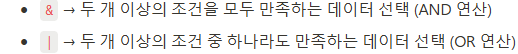

In [30]:
# 클릭수가 800 이상인 캠페인만 선택
high_clicks = df[df["클릭수"] >= 800]
print(high_clicks)

     캠페인      매출액   클릭수    전환율
1  여름 특가  5000000  1200  0.052
3  겨울 세일  4300000   980  0.049


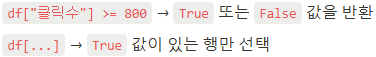

###**image.png 활용한 필터링**

In [31]:
# 매출액이 400만 원 이상인 캠페인 선택
filtered_df = df.query("매출액 >= 4000000")
print(filtered_df)

     캠페인      매출액   클릭수    전환율
1  여름 특가  5000000  1200  0.052
3  겨울 세일  4300000   980  0.049


In [32]:
# 매출액이 400만 원 이상이고 전환율이 0.05 이상인 캠페인 선택
filtered_df = df.query("매출액 >= 4000000 and 전환율 >= 0.05")
print(filtered_df)

     캠페인      매출액   클릭수    전환율
1  여름 특가  5000000  1200  0.052


###**특정 값이 포함된 데이터 필터링: image.png**

In [33]:
# 특정 캠페인만 선택
selected_campaigns = df[df["캠페인"].isin(["봄맞이 할인", "겨울 세일"])]
print(selected_campaigns)

      캠페인      매출액  클릭수    전환율
0  봄맞이 할인  3500000  750  0.045
3   겨울 세일  4300000  980  0.049


###**문자열 포함하는 데이터 필터링: image.png**

In [34]:
# "할인"이 포함된 캠페인만 선택
discount_campaigns = df[df["캠페인"].str.contains("할인")]
print(discount_campaigns)

      캠페인      매출액  클릭수    전환율
0  봄맞이 할인  3500000  750  0.045


###**특정 범위에 있는 데이터 필터링: image.png**

In [35]:
# 매출액이 300만 원에서 450만 원 사이인 캠페인 선택
filtered_df = df[df["매출액"].between(3000000, 4500000)]
print(filtered_df)

      캠페인      매출액  클릭수    전환율
0  봄맞이 할인  3500000  750  0.045
3   겨울 세일  4300000  980  0.049




---

예제1) 클릭수 상위 50% 캠페인 선택

In [36]:
median_clicks = df["클릭수"].median()

df_filtered = df[df["클릭수"] >= median_clicks]
display(df_filtered)

,캠페인,매출액,클릭수,전환율
1,여름 특가,5000000,1200,0.052
3,겨울 세일,4300000,980,0.049


예제2) 특정 단어 포함된 캠페인 필터링

In [37]:
# "할인"이 포함된 캠페인 선택
discount_campaigns = df[df["캠페인"].str.contains("할인")]
display(discount_campaigns)

,캠페인,매출액,클릭수,전환율
0,봄맞이 할인,3500000,750,0.045


예제3) 매출액이 특정 범위 내에 있는 캠페인 필터링

In [38]:
# 매출액 300-450만원 사이인 캠페인 선택
df_filtered = df[df["매출액"].between(3000000, 4500000)]
display(df_filtered)

,캠페인,매출액,클릭수,전환율
0,봄맞이 할인,3500000,750,0.045
3,겨울 세일,4300000,980,0.049


예제4) 전환율 높은 상위 캠페인 선택

In [39]:
mean_conversion = df["전환율"].mean()

# 전환율 평균 이상인 캠페인 선택
df_filtered = df[df["전환율"] >= mean_conversion]
display(df_filtered)

,캠페인,매출액,클릭수,전환율
1,여름 특가,5000000,1200,0.052
3,겨울 세일,4300000,980,0.049


예제5) 다중 조건 필터링

In [40]:
# 매출액 400만원 이상, 클릭수 900 이상 캠페인 선택
df_filtered = df.query("매출액 >= 4000000 and 클릭수 >= 900")
display(df_filtered)

,캠페인,매출액,클릭수,전환율
1,여름 특가,5000000,1200,0.052
3,겨울 세일,4300000,980,0.049




---

##**데이터 정렬 & 필터링 결합하기**

In [41]:
# 클릭수가 800 이상인 캠페인 중, 매출액 기준으로 내림차순 정렬
filtered_sorted_df = df[df["클릭수"] >= 800].sort_values(by="매출액", ascending=False)
display(filtered_sorted_df)

,캠페인,매출액,클릭수,전환율
1,여름 특가,5000000,1200,0.052
3,겨울 세일,4300000,980,0.049


예제1) 클릭수 상위 50% 캠페인 중, 전환율 기준 내림차순 정렬

In [45]:
median_clicks = df["클릭수"].median()
print(median_clicks)

filtered_sorted_df = df[df["클릭수"] > median_clicks].sort_values(by="전환율", ascending=False)
display(filtered_sorted_df)

865.0


,캠페인,매출액,클릭수,전환율
1,여름 특가,5000000,1200,0.052
3,겨울 세일,4300000,980,0.049


예제2) 매출액 평균 이상인 캠페인 중, 클릭수 기준 오름차순 정렬

In [47]:
mean_revenue = df["매출액"].mean()

filtered_sorted_df = df[df["매출액"] >= mean_revenue].sort_values(by="클릭수", ascending=True)
display(filtered_sorted_df)

,캠페인,매출액,클릭수,전환율
3,겨울 세일,4300000,980,0.049
1,여름 특가,5000000,1200,0.052


예제3) 특정 단어 포함 캠페인 중, 매출액 내림차순 정렬

In [48]:
# "할인" 포함된 캠페인 선택
filtered_sorted_df = df[df["캠페인"].str.contains("할인")].sort_values(by="매출액", ascending=False)
display(filtered_sorted_df)

,캠페인,매출액,클릭수,전환율
0,봄맞이 할인,3500000,750,0.045


예제4) 전환율 특정 범위 내에 있는 캠페인 중, 클릭수 내림차순 정렬

In [49]:
# 전환율 0.04-0.05 캠페인 선택
filtered_sorted_df = df[df["전환율"].between(0.04, 0.05)].sort_values(by="클릭수", ascending=False)
display(filtered_sorted_df)

,캠페인,매출액,클릭수,전환율
3,겨울 세일,4300000,980,0.049
0,봄맞이 할인,3500000,750,0.045


예제5) 다중 조건 필터링 후, 정렬

In [50]:
# 매출액 300만원 이상, 전환율 0.045 이상
filtered_sorted_df = df.query("매출액 >= 3000000 and 전환율 >= 0.045").sort_values(by="클릭수", ascending=False)
display(filtered_sorted_df)

,캠페인,매출액,클릭수,전환율
1,여름 특가,5000000,1200,0.052
3,겨울 세일,4300000,980,0.049
0,봄맞이 할인,3500000,750,0.045




---

##**정리**
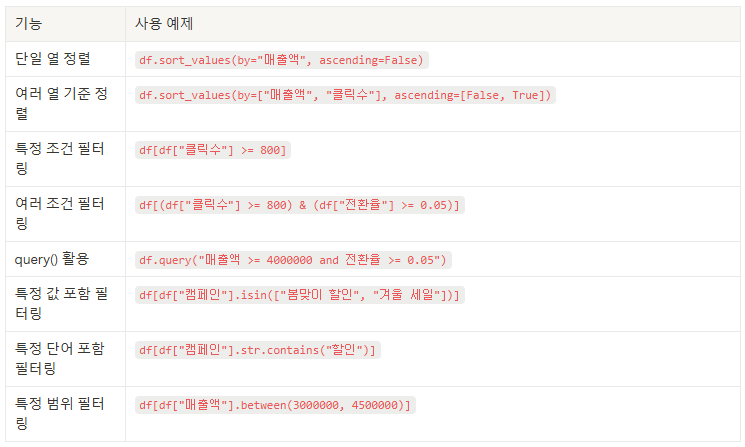



---

##**Pandas 데이터 그룹화 및 집계**

###**데이터 그룹화: image.png**
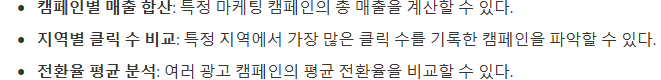

In [55]:
# 그로스 마케팅 데이터 예제

data = {
    "캠페인": ["봄맞이 할인", "여름 특가", "가을 이벤트", "겨울 세일",
            "봄맞이 할인", "여름 특가", "가을 이벤트", "겨울 세일"],
    "지역": ["서울", "서울", "부산", "부산", "대구", "대구", "광주", "광주"],
    "매출액": [3500000, 5000000, 2200000, 4300000,
            3200000, 4700000, 2000000, 4000000],
    "클릭수": [750, 1200, 540, 980, 720, 1150, 520, 950],
    "전환율": [0.045, 0.052, 0.038, 0.049, 0.042, 0.050, 0.035, 0.048]
}

# 데이터프레임 생성
df1 = pd.DataFrame(data)

# 데이터프레임 출력
print("=== 원본 데이터 ===")
display(df1)

# CSV 파일로 저장
df1.to_csv("marketing_data2.csv", index=False, encoding="utf-8-sig")

# 저장된 CSV 파일 불러오기
df_loaded = pd.read_csv("marketing_data2.csv", encoding="utf-8-sig")

print("\n=== CSV 파일에서 로드한 데이터 ===")
display(df_loaded)

=== 원본 데이터 ===


,캠페인,지역,매출액,클릭수,전환율
0,봄맞이 할인,서울,3500000,750,0.045
1,여름 특가,서울,5000000,1200,0.052
2,가을 이벤트,부산,2200000,540,0.038
3,겨울 세일,부산,4300000,980,0.049
4,봄맞이 할인,대구,3200000,720,0.042
5,여름 특가,대구,4700000,1150,0.050
6,가을 이벤트,광주,2000000,520,0.035
7,겨울 세일,광주,4000000,950,0.048



=== CSV 파일에서 로드한 데이터 ===


,캠페인,지역,매출액,클릭수,전환율
0,봄맞이 할인,서울,3500000,750,0.045
1,여름 특가,서울,5000000,1200,0.052
2,가을 이벤트,부산,2200000,540,0.038
3,겨울 세일,부산,4300000,980,0.049
4,봄맞이 할인,대구,3200000,720,0.042
5,여름 특가,대구,4700000,1150,0.050
6,가을 이벤트,광주,2000000,520,0.035
7,겨울 세일,광주,4000000,950,0.048


###**단일 열 기준으로 데이터 그룹화**

캠페인별 매출 합산

In [52]:
df_grouped = df1.groupby("캠페인")["매출액"].sum()
print(df_grouped)

캠페인
가을 이벤트    4200000
겨울 세일     8300000
봄맞이 할인    6700000
여름 특가     9700000
Name: 매출액, dtype: int64


캠페인별 평균 클릭 수

In [54]:
df_grouped = df1.groupby("캠페인")["클릭수"].mean()
print(df_grouped)

캠페인
가을 이벤트     530.0
겨울 세일      965.0
봄맞이 할인     735.0
여름 특가     1175.0
Name: 클릭수, dtype: float64


###**여러 개의 열 기준으로 그룹화**

캠페인과 지역별 매출 합계

In [57]:
df_grouped = df1.groupby(["캠페인", "지역"])["매출액"].sum()
display(df_grouped)

캠페인     지역
가을 이벤트  광주    2000000
        부산    2200000
겨울 세일   광주    4000000
        부산    4300000
봄맞이 할인  대구    3200000
        서울    3500000
여름 특가   대구    4700000
        서울    5000000
Name: 매출액, dtype: int64

캠페인과 지역별 클릭수 평균

In [58]:
df_grouped = df1.groupby(["캠페인", "지역"])["클릭수"].mean()
display(df_grouped)

캠페인     지역
가을 이벤트  광주     520.0
        부산     540.0
겨울 세일   광주     950.0
        부산     980.0
봄맞이 할인  대구     720.0
        서울     750.0
여름 특가   대구    1150.0
        서울    1200.0
Name: 클릭수, dtype: float64

###**그룹화된 데이터에서 여러 개의 집계 연산 적용: image.png**

캠페인별 매출액과 클릭수에 대한 집계 연산 작용

In [59]:
df_grouped = df1.groupby("캠페인").agg({"매출액": ["sum", "mean"], "클릭수": ["sum", "mean"]})
display(df_grouped)

매출액              클릭수        
            sum       mean   sum    mean
캠페인                                     
가을 이벤트  4200000  2100000.0  1060   530.0
겨울 세일   8300000  4150000.0  1930   965.0
봄맞이 할인  6700000  3350000.0  1470   735.0
여름 특가   9700000  4850000.0  2350  1175.0

###**그룹화된 데이터 필터링**

In [64]:
# 캠페인별 매출액 합계 700만원 이상 선택
df_filtered = df1.groupby("캠페인")["매출액"].sum()

df_filtered = df_filtered[df_filtered >= 7000000]
display(df_filtered)

,매출액
캠페인,
겨울 세일,8300000
여름 특가,9700000




---

## **그로스 마케팅 프로모션 핵심 원칙**

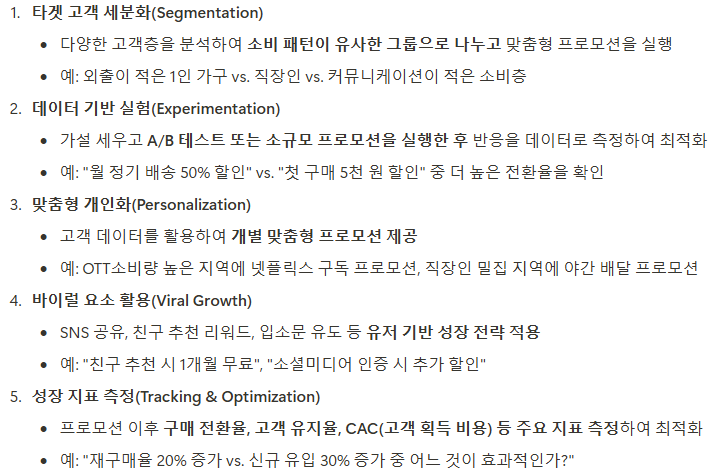



---

##**Pandas 이용한 서울시 상권분석 서비스**

In [72]:
df = pd.read_csv("서울시_상권분석서비스(추정매출-상권)_2022년.csv", encoding="utf-8-sig")
display(df)

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,20221,D,발달상권,3120068,사가정역,CS200016,당구장,6207432.0,362,3619902.0,...,163,82,347,15,0,42,38,45,150,87
1,20221,A,골목상권,3110316,숭곡초등학교,CS300033,철물점,11755885.0,69,11755885.0,...,0,0,69,0,0,0,0,69,0,0
2,20221,R,전통시장,3130032,인현시장,CS200037,노래방,49610438.0,339,37313834.0,...,255,84,296,0,0,0,169,0,127,0
3,20221,D,발달상권,3120105,상수역(홍대),CS300001,슈퍼마켓,4091445.0,236,2589971.0,...,148,0,0,236,0,148,88,0,0,0
4,20221,A,골목상권,3110431,상계역,CS300001,슈퍼마켓,1828934.0,16,1828934.0,...,6,0,0,16,0,0,0,0,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83568,20224,R,전통시장,3130051,동화동 골목형상점가,CS100010,커피-음료,74566607.0,11618,46002960.0,...,811,56,4239,7016,41,1539,2107,2831,2696,2037
83569,20224,A,골목상권,3110121,한양대역 4번,CS100010,커피-음료,496341232.0,74976,343713652.0,...,22056,9747,37372,37498,6632,45799,6409,5767,9168,1094
83570,20224,A,골목상권,3110163,성자초등학교,CS100010,커피-음료,60999234.0,10668,39994099.0,...,2205,349,5054,5440,212,2459,2483,2900,1459,980
83571,20224,A,골목상권,3110110,상왕십리역 6번,CS100010,커피-음료,35826724.0,4681,17309483.0,...,361,0,1811,2870,0,1966,1784,672,155,104


In [68]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 55 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   기준_년분기_코드        83573 non-null  int64  
 1   상권_구분_코드         83573 non-null  object 
 2   상권_구분_코드_명       83573 non-null  object 
 3   상권_코드            83573 non-null  int64  
 4   상권_코드_명          83573 non-null  object 
 5   서비스_업종_코드        83573 non-null  object 
 6   서비스_업종_코드_명      83573 non-null  object 
 7   당월_매출_금액         83573 non-null  float64
 8   당월_매출_건수         83573 non-null  int64  
 9   주중_매출_금액         83573 non-null  float64
 10  주말_매출_금액         83573 non-null  float64
 11  월요일_매출_금액        83573 non-null  float64
 12  화요일_매출_금액        83573 non-null  float64
 13  수요일_매출_금액        83573 non-null  float64
 14  목요일_매출_금액        83573 non-null  float64
 15  금요일_매출_금액        83573 non-null  float64
 16  토요일_매출_금액        83573 non-null  float64
 17  일요일_매출_금액   

None

**1. 업종별 매출액 Top 5 분석**

**목표**: 업종별(서비스_업종_코드_명) 매출액 상위 5개 상권 출력

In [74]:
top_sales_per_sector = df.groupby("서비스_업종_코드_명")["당월_매출_금액"].nlargest(5).reset_index()
top_sales_per_sector = df.loc[top_sales_per_sector["level_1"]]
display(top_sales_per_sector)

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
52583,20223,R,전통시장,3130069,"한양대앞상점가(한양시장, 왕십리맛골목)",CS200019,PC방,3.367731e+09,740116,2.296879e+09,...,230010,139535,606911,133205,107331,503697,76202,22647,27952,2287
66160,20224,R,전통시장,3130069,"한양대앞상점가(한양시장, 왕십리맛골목)",CS200019,PC방,3.233070e+09,699696,2.166837e+09,...,227563,129545,583794,115902,118176,445987,75839,28894,28722,2078
35647,20222,R,전통시장,3130069,"한양대앞상점가(한양시장, 왕십리맛골목)",CS200019,PC방,3.159396e+09,723271,2.232426e+09,...,225804,127550,607530,115741,102397,483787,95693,13598,25008,2788
10361,20221,R,전통시장,3130069,"한양대앞상점가(한양시장, 왕십리맛골목)",CS200019,PC방,2.674723e+09,637545,1.764819e+09,...,270376,38469,513025,124520,58880,445344,93082,14792,24351,1096
68397,20224,D,발달상권,3120079,창동역,CS200019,PC방,1.625592e+09,358492,1.021312e+09,...,116641,60866,286515,71977,79389,139477,75650,24353,26332,13291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38858,20222,D,발달상권,3120182,"양재시민의숲역(양재동꽃시장, aT센터)",CS300028,화초,1.747962e+10,287693,1.331335e+10,...,32199,154,95166,151696,703,18008,48833,51959,56787,70578
637,20221,D,발달상권,3120182,"양재시민의숲역(양재동꽃시장, aT센터)",CS300028,화초,1.462688e+10,221811,1.142143e+10,...,20813,31,75797,107695,214,11964,34286,40554,46431,50041
64895,20224,D,발달상권,3120182,"양재시민의숲역(양재동꽃시장, aT센터)",CS300028,화초,1.168812e+10,142834,9.460719e+09,...,10499,92,41904,70990,122,8637,22646,23989,24904,32596
49216,20223,D,발달상권,3120182,"양재시민의숲역(양재동꽃시장, aT센터)",CS300028,화초,1.039994e+10,121122,8.999047e+09,...,11151,154,34139,58671,183,6226,19075,19304,21830,26193


**2. 특정 상권(예: 홍대)에서 가장 매출 높은 업종 찾기**

In [76]:
hongdae_sales = df[df["상권_코드_명"].str.contains("홍대")]
top_hongdae = hongdae_sales.sort_values(by="당월_매출_금액", ascending=False).head(5)
display(top_hongdae)

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
64513,20224,D,발달상권,3120103,홍대입구역(홍대),CS100001,한식음식점,3.111845e+10,910417,1.824869e+10,...,255729,184405,435281,444410,40934,486477,178305,72193,78184,23590
54708,20223,D,발달상권,3120103,홍대입구역(홍대),CS100001,한식음식점,2.651325e+10,827888,1.607188e+10,...,230154,178331,402470,390296,33530,430581,168076,70200,68422,21955
27261,20222,D,발달상권,3120103,홍대입구역(홍대),CS100001,한식음식점,2.542433e+10,860554,1.549125e+10,...,237737,193286,427905,398086,31822,450649,178611,70419,72235,22256
23054,20222,D,발달상권,3120103,홍대입구역(홍대),CS300011,일반의류,1.943387e+10,425581,1.149788e+10,...,209049,49366,86840,337594,21689,252149,68036,39060,37086,6418
75140,20224,D,발달상권,3120103,홍대입구역(홍대),CS300011,일반의류,1.942925e+10,304825,1.192422e+10,...,147722,37642,64266,238414,19356,178955,44109,29103,27216,3941


**3. 주중과 주말 매출 차이 가장 큰 업종**

In [79]:
df["주중_주말_매출차"] = abs(df["주중_매출_금액"] - df["주말_매출_금액"]) # abs(): 절대값
top_weekend_diff = df.sort_values(by="주중_주말_매출차", ascending=False).head()
display(top_weekend_diff[["서비스_업종_코드_명", "주중_매출_금액", "주말_매출_금액", "주중_주말_매출차"]])

,서비스_업종_코드_명,주중_매출_금액,주말_매출_금액,주중_주말_매출차
71761,컴퓨터및주변장치판매,6.697990e+11,6.834724e+10,6.014518e+11
11947,컴퓨터및주변장치판매,6.542310e+11,9.708672e+10,5.571443e+11
43815,컴퓨터및주변장치판매,5.863310e+11,5.898461e+10,5.273464e+11
34688,컴퓨터및주변장치판매,4.958210e+11,6.028884e+10,4.355322e+11
82939,반찬가게,2.145800e+11,4.967586e+10,1.649041e+11


**분석**: 컴퓨터 및 주변장치 판매 업종이 top5에 가장 많이 있음

1. 금액: 주말_매출_금액이 모두 주중_매출_금액보다 높음

2. 즉 주말에 구매가 많은 것을 알 수 있으며, 이는 직장인 등 위크데이로 평일에 바쁜 사람들이 많이 구매하는 것을 알 수 있음

3. 자사가 판매하는 컴퓨터 정보를 요약해 잘 보여주는 유튜브 등의 홍보를 통해, 구매에 드는 고민 시간을 줄여 평일에도 매출로 이루어질 수 있도록 함

**마케팅 관점에서 설명**: 결과로 출력된 '컴퓨터 및 주변장치 판매' 업종의 경우, 구매 및 상담에 시간이 많이 소요될 가능성이 크기 때문에 소비자들이 이를 목적으로 충분한 시간을 확보할 수 있는 주말에 이용할 수 밖에 없음. 따라서 이 상권에는 평일 매출을 보완하여 전체 매출을 올리는 것이 중요하므로 평일 시간대에 문제가 없는 상품을 기획해 집중배치하는 것이 전체 매출 향상에 도움될 것으로 보임.

**4. 특정 연령대(20~30대) 매출 비중 높은 업종**

In [83]:
df["청년층_매출비율"] = (df["연령대_20_매출_금액"] + df["연령대_30_매출_금액"]) / df["당월_매출_금액"]
top_youth_focused = df.sort_values(by="청년층_매출비율", ascending=False).head()
display(top_youth_focused[["서비스_업종_코드_명", "청년층_매출비율"]])

,서비스_업종_코드_명,청년층_매출비율
49965,스포츠클럽,1.0
77581,스포츠클럽,1.0
10391,자동차수리,1.0
20863,전자상거래업,1.0
75726,양식음식점,1.0


**5. 특정 시간대(밤 9~12시) 매출 높은 업종**

In [84]:
top_night_sales = df.sort_values(by="시간대_21~24_매출_금액", ascending=False).head()
display(top_night_sales[["서비스_업종_코드_명", "시간대_21~24_매출_금액"]])

,서비스_업종_코드_명,시간대_21~24_매출_금액
82901,수산물판매,33921517889
25564,수산물판매,25411773724
82939,반찬가게,23606287024
62212,반찬가게,23151355508
45144,수산물판매,21697726478


**6. 여성 고객 매출 비율 높은 업종**

In [85]:
df["여성_매출비율"] = df["여성_매출_금액"] / df["당월_매출_금액"]
top_female_sales = df.sort_values(by="여성_매출비율", ascending=False).head()
display(top_female_sales[["서비스_업종_코드_명", "여성_매출비율"]])

,서비스_업종_코드_명,여성_매출비율
59898,인테리어,1.0
20915,인테리어,1.0
77132,반찬가게,1.0
65395,예술학원,1.0
65392,예술학원,1.0


**7. 매출 건당 평균 결제 금액 가장 높은 업종**

In [86]:
df["평균_결제금액"] = df["당월_매출_금액"] / df["당월_매출_건수"]
top_avg_transaction = df.sort_values(by="평균_결제금액", ascending=False).head(1)
display(top_avg_transaction[["서비스_업종_코드_명", "평균_결제금액"]])

,서비스_업종_코드_명,평균_결제금액
75891,운동/경기용품,2.744723e+07


**8. 매출액 증가 폭 큰 상권 찾기**

**목표**: 상권별 최근 분기(기준_년분기_코드) 대비 매출액 증가율 높은 상권 찾기

In [88]:
from typing_extensions import AsyncGenerator
recent_period = df["기준_년분기_코드"].max()
previous_period = recent_period - 1

recent_sales = df[df["기준_년분기_코드"] == recent_period]
previous_sales = df[df["기준_년분기_코드"] == previous_period]

sales_growth = recent_sales.merge(previous_sales, on="상권_코드", suffixes=("_최근", "_이전"))
sales_growth["매출_증가율"] = (sales_growth["당월_매출_금액_최근"] - sales_growth["당월_매출_금액_이전"]) / sales_growth["당월_매출_금액_이전"]

top_growth = sales_growth.sort_values(by="매출_증가율", ascending=False).head()
display(top_growth[["상권_코드_명_최근", "매출_증가율"]])

,상권_코드_명_최근,매출_증가율
457836,이화달팽이길,2.496519e+07
166039,중림동,7.498597e+06
45141,중림동,6.958245e+06
217475,종로3가역,6.090676e+06
168959,이화달팽이길,3.967734e+06


**9. 성수기 요일(금~일) 매출 비중 높은 업종**

In [90]:
df["주말_매출비율"] = (df["금요일_매출_금액"] + df["토요일_매출_금액"] + df["일요일_매출_금액"]) / df["당월_매출_금액"]
top_weekend_sales = df.sort_values(by="주말_매출비율", ascending=False).head()
display(top_weekend_sales[["서비스_업종_코드_명", "주말_매출비율"]])

,서비스_업종_코드_명,주말_매출비율
50673,컴퓨터및주변장치판매,1.0
46740,서적,1.0
28486,가전제품수리,1.0
28488,컴퓨터및주변장치판매,1.0
28493,반찬가게,1.0


**10. 특정 상권(예: 강남)에서 30대 매출 높은 업종**

In [91]:
gangnam_sales = df[df["상권_코드_명"].str.contains("강남")]
top_gangnam_30s = gangnam_sales.sort_values(by="연령대_30_매출_금액", ascending=False).head()
display(top_gangnam_30s)

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,...,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,주중_주말_매출차,청년층_매출비율,여성_매출비율,평균_결제금액,주말_매출비율
36869,20222,D,발달상권,3120189,강남역,CS200006,일반의원,1.211370e+11,432178,1.006960e+11,...,114939,120194,68437,78463,48153,8.025503e+10,0.496467,0.661881,280294.230618,0.383993
52506,20223,D,발달상권,3120189,강남역,CS200006,일반의원,1.152200e+11,417496,9.798384e+10,...,116505,116939,71895,71206,38606,8.074808e+10,0.529417,0.660750,275978.692011,0.376669
79273,20224,D,발달상권,3120189,강남역,CS200006,일반의원,1.153120e+11,408076,9.533676e+10,...,112510,115816,69655,68648,38522,7.536134e+10,0.504938,0.646928,282574.814495,0.397369
6287,20221,D,발달상권,3120189,강남역,CS200006,일반의원,1.622100e+11,373154,1.335640e+11,...,94540,100269,59373,77493,40047,1.049186e+11,0.348727,0.650391,434699.882622,0.399391
60948,20223,U,관광특구,3001496,강남 마이스 관광특구,CS300011,일반의류,1.015130e+11,1237701,6.534809e+10,...,298092,366992,289355,188779,81049,2.918293e+10,0.478800,0.722128,82017.385459,0.516891




---

##**서울시 저소득층을 위한 정책 설계 근거 위한 분석**

**1. 60세 이상 소비 비율 높은 지역 및 업종 분석**

In [92]:
df["노년층_매출비율"] = df["연령대_60_이상_매출_금액"] / df["당월_매출_금액"]
top_senior_areas = df.sort_values(by="노년층_매출비율", ascending=False).head(10)
display(top_senior_areas[["상권_코드_명", "서비스_업종_코드_명", "노년층_매출비율"]])

,상권_코드_명,서비스_업종_코드_명,노년층_매출비율
45477,송파책박물관,컴퓨터및주변장치판매,1.0
69582,신사역,시계및귀금속,1.0
44196,샘말어린이공원,가전제품,1.0
14593,보라매공원,수산물판매,1.0
28443,미아역 5번,전자상거래업,1.0
48937,공항시장,육류판매,1.0
40117,동성타워프라자,화장품,1.0
24564,뚝섬역,의료기기,1.0
24566,명일역,전자상거래업,1.0
16055,상계백병원,의료기기,1.0


**2. 저소득층이 주로 소비하는 업종 및 시간대 분석**

In [93]:
low_income_businesses = df[df["서비스_업종_코드_명"].isin(["편의점", "시장", "할인점", "슈퍼마켓"])]
low_income_businesses["야간_매출비율"] = (low_income_businesses["시간대_21~24_매출_금액"] + low_income_businesses["시간대_00~06_매출_금액"]) / low_income_businesses["당월_매출_금액"]

top_night_businesses = low_income_businesses.sort_values(by="야간_매출비율", ascending=False).head(10)
display(top_night_businesses[["상권_코드_명", "서비스_업종_코드_명", "야간_매출비율"]])

<ipython-input-93-4329890b2c54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_income_businesses["야간_매출비율"] = (low_income_businesses["시간대_21~24_매출_금액"] + low_income_businesses["시간대_00~06_매출_금액"]) / low_income_businesses["당월_매출_금액"]


,상권_코드_명,서비스_업종_코드_명,야간_매출비율
42909,삼성중앙역,슈퍼마켓,1.000000
74162,team204(팀204),슈퍼마켓,0.977385
70081,사당종합체육관,슈퍼마켓,0.947103
234,team204(팀204),슈퍼마켓,0.919235
50171,team204(팀204),슈퍼마켓,0.882535
21584,team204(팀204),슈퍼마켓,0.841963
10600,영등포구청역,슈퍼마켓,0.817486
33764,남산케이블카,편의점,0.795913
35868,영등포구청역,슈퍼마켓,0.734363
15754,"평화시장(남평화시장, 제일평화시장, 신평화패션타운)",슈퍼마켓,0.705124


**3. 대형마트와 전통시장 간의 소비 패턴 비교**

In [96]:
traditional_markets = df[df["상권_구분_코드_명"] == "전통시장"]
shopping_malls = df[df["상권_구분_코드_명"].str.contains("대형마트")]

avg_market_sales = traditional_markets["당월_매출_금액"].mean()
avg_mall_sales = shopping_malls["당월_매출_금액"].mean()

print(f"전통시장 평균 매출액: {avg_market_sales:.2f}원")
print(f"대형마트 평균 매출액: {avg_mall_sales}원")

전통시장 평균 매출액: 952054162.42원
대형마트 평균 매출액: nan원


**4. 저소득층 밀집 지역 주요 소비 업종 분석**

In [97]:
low_income_areas = df[df["상권_구분_코드_명"] == "전통시장"]
top_low_income_sectors = low_income_areas.groupby("서비스_업종_코드_명")["당월_매출_금액"].sum().sort_values(ascending=False).head(10)
display(top_low_income_sectors)

,당월_매출_금액
서비스_업종_코드_명,
청과상,2.492038e+12
육류판매,1.698929e+12
한식음식점,1.442187e+12
슈퍼마켓,6.175491e+11
반찬가게,5.797198e+11
일반의류,5.540684e+11
의약품,4.836122e+11
일반의원,4.770654e+11
수산물판매,4.305907e+11


**5. 공공급식 또는 무료 식사 제공이 필요한 지역 분석**

In [99]:
food_businesses = df[df["서비스_업종_코드_명"].str.contains("식당|한식|분식|제과")]

low_income_food_areas = food_businesses.sort_values(by="당월_매출_금액", ascending=True).head(10)
display(low_income_food_areas[["상권_코드_명", "서비스_업종_코드_명", "당월_매출_금액"]])

,상권_코드_명,서비스_업종_코드_명,당월_매출_금액
23337,방배동사이길,분식전문점,12466.0
41807,강동역 4번(강풀만화거리),제과점,13467.0
24856,용산구청,분식전문점,54739.0
54892,한강성심병원,분식전문점,73732.0
40249,구반포역,분식전문점,81391.0
29744,영등포전통시장,분식전문점,147465.0
25912,한강성심병원,분식전문점,162211.0
9760,홍대부속여중고앞,분식전문점,205002.0
59882,장안중학교,분식전문점,208938.0
4540,종로신진시장,분식전문점,238715.0




---

##**그로스 마케팅 프로모션 절차**

###**서울시 1인가구 Dataset 이용한 신규 비즈니스 설계**

In [100]:
df = pd.read_csv("1인가구관심집단.csv", encoding="utf-8-sig")
display(df)
display(df.info())

,행정동코드,자치구,행정동명,성별,연령대,총인구,1인가구수,커뮤니케이션이_적은_집단,평일_외출이_적은_집단,휴일_외출이_적은_집단,출근소요시간_및_근무시간이_많은_집단,외출이_매우_적은_집단_전체,외출이_매우_많은_집단,동영상서비스_이용이_많은_집단,생활서비스_이용이_많은_집단,재정상태에_대한_관심집단,외출_커뮤니케이션이_모두_적은_집단_전체
0,1101053,종로구,사직동,1,20,220,68,14,7,4,6,4,5,10,3,4,2
1,1101053,종로구,사직동,1,25,321,107,16,12,5,14,5,12,11,22,16,5
2,1101053,종로구,사직동,1,30,351,107,19,16,12,12,12,19,17,12,15,8
3,1101053,종로구,사직동,1,35,353,105,22,13,7,11,11,17,16,9,7,9
4,1101053,종로구,사직동,1,40,419,79,18,7,11,6,12,11,12,6,6,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10171,1125074,강동구,길동,2,55,"2,262",307,32,47,26,62,52,13,52,33,28,74
10172,1125074,강동구,길동,2,60,"1,532",206,19,38,13,42,48,6,34,19,8,61
10173,1125074,강동구,길동,2,65,"1,039",182,14,20,14,28,24,2,19,27,25,25
10174,1125074,강동구,길동,2,70,804,137,14,31,2,29,29,1,26,21,11,37


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10176 entries, 0 to 10175
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   행정동코드                   10176 non-null  int64 
 1   자치구                     10176 non-null  object
 2   행정동명                    10176 non-null  object
 3   성별                      10176 non-null  int64 
 4   연령대                     10176 non-null  int64 
 5   총인구                     10176 non-null  object
 6   1인가구수                   10176 non-null  object
 7   커뮤니케이션이_적은_집단           10176 non-null  int64 
 8   평일_외출이_적은_집단            10176 non-null  int64 
 9   휴일_외출이_적은_집단            10176 non-null  int64 
 10  출근소요시간_및_근무시간이_많은_집단    10176 non-null  int64 
 11  외출이_매우_적은_집단_전체         10176 non-null  int64 
 12  외출이_매우_많은_집단            10176 non-null  int64 
 13  동영상서비스_이용이_많은_집단        10176 non-null  int64 
 14  생활서비스_이용이_많은_집단         10176 non-null  int64 
 15  재정

None

In [117]:
df["1인가구수"] = pd.to_numeric(df["1인가구수"], errors='coerce')
df["총인구"] = pd.to_numeric(df["총인구"], errors='coerce')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10176 entries, 0 to 10175
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   행정동코드                   10176 non-null  int64  
 1   자치구                     10176 non-null  object 
 2   행정동명                    10176 non-null  object 
 3   성별                      10176 non-null  int64  
 4   연령대                     10176 non-null  int64  
 5   총인구                     7376 non-null   float64
 6   1인가구수                   10100 non-null  float64
 7   커뮤니케이션이_적은_집단           10176 non-null  int64  
 8   평일_외출이_적은_집단            10176 non-null  int64  
 9   휴일_외출이_적은_집단            10176 non-null  int64  
 10  출근소요시간_및_근무시간이_많은_집단    10176 non-null  int64  
 11  외출이_매우_적은_집단_전체         10176 non-null  int64  
 12  외출이_매우_많은_집단            10176 non-null  int64  
 13  동영상서비스_이용이_많은_집단        10176 non-null  int64  
 14  생활서비스_이용이_많은_집단         10176 non-null

####**1단계: 데이터 분석 통한 고객 타겟팅**


In [118]:
# 자치구별 1인 가구 비율 분석

df["1인가구_비율"] = (df["1인가구수"] / df["총인구"]) * 100
one_person_ratio = df.groupby("자치구")["1인가구_비율"].mean().sort_values(ascending=False)
display(one_person_ratio.head())

,1인가구_비율
자치구,
중구,32.223491
종로구,25.708250
광진구,23.594207
관악구,22.864523
용산구,22.518476


**결과 분석:**
- 1인 가구 비율 높은 지역에서는 배달 서비스, 무인 상점, 정기 구독 서비즈의 수요가 높을 가능성 큼
- 이 데이터를 바탕으로 특정 지역에서 실험적인 프로모션 실행 가능

####**2단계: 가장 적합한 상품 선정**

In [119]:
# 외출 적은 지역에서 배달 서비스 수요 분석

df["외출_적은_비율"] = ((df["평일_외출이_적은_집단"] + df["휴일_외출이_적은_집단"]) / df["총인구"]) * 100
low_outdoor_areas = df.groupby("자치구")["외출_적은_비율"].mean().sort_values(ascending=False)
display(low_outdoor_areas.head())

,외출_적은_비율
자치구,
중구,9.088660
종로구,6.090515
광진구,5.220007
관악구,5.066938
용산구,4.714053


**결과 분석:**
- 외출이 적은 지역에서는 간편식, 신선식품 정기 배송, 온라인 쇼핑 관련 프로모션이 효과적일 가능성 큼

####**3단계: 프로모션 전략 수립 및 실험 (A/B 테스트)**
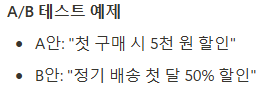

In [120]:
# 직장인 많은 지역에서 헬스케어 및 건강식품 수요 분석

df["직장인_비율"] = (df["출근소요시간_및_근무시간이_많은_집단"] / df["총인구"]) * 100
high_work_areas = df.groupby("자치구")["직장인_비율"].mean().sort_values(ascending=False)
display(high_work_areas.head())

,직장인_비율
자치구,
중구,4.307129
종로구,3.451308
광진구,2.592479
금천구,2.311025
강북구,2.232760


**결과 분석:**
- 직장인 비율 높은 지역에서는 야간 헬스장 쿠폰, 단백질 보충제 할인, 건강식 배달 서비스 프로모션이 효과적일 가능성 큼

####**4단계: 프로모션 실행 및 바이럴 마케팅 적용**

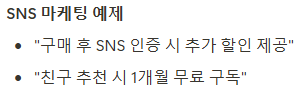

In [121]:
# 동영상 서비스 이용 많은 지역에서 OTT 및 스마트 기기 판매 분석

df["동영상_이용_비율"] = (df["동영상서비스_이용이_많은_집단"] / df["총인구"]) * 100
video_usage_areas = df.groupby("자치구")["동영상_이용_비율"].mean().sort_values(ascending=False)
display(video_usage_areas.head())

,동영상_이용_비율
자치구,
중구,4.370363
종로구,3.261259
광진구,2.414169
관악구,2.348453
용산구,2.204350


**결과 분석:**
- 동영상 소비가 많은 지역에서는 넷플릭스 같은 OTT 서비스 할인, 스마트 TV 프로모션이 효과적일 가능성 큼

####**5단계: 프로모션 성과 분석 및 최적화**
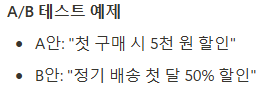

####**6단계: 반복 최적화 및 확장**
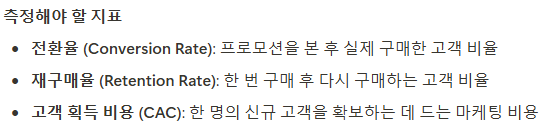



---

##**잘 팔릴 만한 상품 선정하는 분석 시나리오**

###**1. 외출이 적은 1인 가구 대상 "프리미엄 배달 서비스"**

**목표:**

외출 적은 1인 가구가 많은 지역에서 즉석 조리식품, 신선식품 정기 배달, 생필품 구독 서비스의 수요 분석하여 최적의 상품 추천

**타겟 고객:**
- 평일, 주말에 외출 적은 1인 가구
- 재택근무자, 고령층, 외출이 어려운 소비자

In [132]:
# 외출이 적은 집단 비율 계산
df["외출_적은_비율"] = (df["평일_외출이_적은_집단"] + df["휴일_외출이_적은_집단"]) / df["총인구"] * 100

# 외출이 적은 비율이 높은 지역 정렬
low_outdoor_areas = df.groupby("자치구")["외출_적은_비율"].mean().sort_values(ascending=False)

display(low_outdoor_areas.head())

,외출_적은_비율
자치구,
중구,9.088660
종로구,6.090515
광진구,5.220007
관악구,5.066938
용산구,4.714053


**마케팅 전략:**
- 정기 배달 서비스 런칭 (식료품, 간편식, 생필품 등)
- 첫 달 무료 구독 이벤트 + 친구 추천 할인
- 무인 배달함 설치 및 심야 배송 옵션 추가

---



###**2. 근무 시간 긴 직장인을 위한 "고단백 간편식 & 헬스케어 제품"**

**목표:**

근무 시간이 긴 직장인이 많은 지역에서 즉석 건강식, 단백질 보충제, 비타민 등의 수요 분석하여 최적의 상품 추천

**타겟 고객:**
- 출퇴근 시간 길고 근무 시간 긴 직장인, 프리랜서, 야근족
- 헬스장 방문이 잦은 소비층

In [131]:
# 직장인이 많은 지역 분석
df["직장인_비율"] = (df["출근소요시간_및_근무시간이_많은_집단"] / df["총인구"]) * 100

# 근무 시간이 긴 직장인이 많은 지역 정렬
work_intensive_areas = df.groupby("자치구")["직장인_비율"].mean().sort_values(ascending=False)

display(work_intensive_areas.head())

,직장인_비율
자치구,
중구,4.307129
종로구,3.451308
광진구,2.592479
금천구,2.311025
강북구,2.232760


**마케팅 전략:**
- 출퇴근 시간대 샘플링 이벤트 (헬스장, 지하철역 등에서 무료 제공)
- 정기 구독자 대상 할인 제공 (3개월 유지 시 10% 할인)
- 야간 배달 서비스 도입 (저녁 9시 이후 배달 무료)

---



###**3. 동영상 콘텐츠 소비가 많은 1인 가구 대상 "홈 엔터테인먼트 & 스마트 기기"**

**목표:**

동영상 서비스 이용이 많은 지역에서 스마트 TV, 무선 스피커, 프리미엄 OTT 구독 패키지 등의 수요 분석하여 최적의 상품 추천

**타겟 고객:**
- 넷플릭스, 유튜브 등 OTT 서비스 이용 비중이 높은 1인 가구
- 집에서 여가 시간을 보내는 소비층

In [130]:
# 동영상 서비스 이용 비율 분석
df["동영상_이용_비율"] = (df["동영상서비스_이용이_많은_집단"] / df["총인구"]) * 100

# 동영상 소비 비율이 높은 지역 정렬
video_usage_areas = df.groupby("자치구")["동영상_이용_비율"].mean().sort_values(ascending=False)

display(video_usage_areas.head())

,동영상_이용_비율
자치구,
중구,4.370363
종로구,3.261259
광진구,2.414169
관악구,2.348453
용산구,2.204350


**마케팅 전략:**
- OTT 구독과 스마트 TV/프로젝터 패키지 할인 제공
- 스트리밍 플랫폼과 제휴하여 프로모션 광고 진행
- 소셜 미디어 공유 이벤트 (구매 후 SNS 인증 시 추가 할인)

---



###**4. 생활 서비스 이용 많은 지역 대상 "홈 케어 & 가사 서비스"**

**목표:**

생활 서비스 이용이 많은 지역에서 무인 세탁 서비스, 가사도우미, 정리정돈 서비스 등의 수요 분석하여 최적의 상품 추천

**타겟 고객:**
- 집안일 직접 하기 어려운 직장인 및 바쁜 1인 가구
- 정리 정돈, 세탁 서비스 수요가 높은 소비층

In [129]:
# 생활 서비스 이용 비율 분석
df["생활서비스_이용_비율"] = (df["생활서비스_이용이_많은_집단"] / df["총인구"]) * 100

# 생활 서비스 이용 비율이 높은 지역 정렬
service_usage_areas = df.groupby("자치구")["생활서비스_이용_비율"].mean().sort_values(ascending=False)

display(service_usage_areas.head(5))

,생활서비스_이용_비율
자치구,
중구,3.255560
종로구,2.513090
용산구,2.340726
관악구,2.329979
광진구,2.301562


**마케팅 전략:**
- 첫 이용 고객 대상 50% 할인 프로모션
- 정기 구독 서비스 제공 (월 3회 방문, 정리정돈 & 세탁 서비스 패키지)
- 기업과 제휴하여 직원 복지 프로그램 포함

---



###**5. 재정 상태에 관심 많은 소비자 대상 "소액 투자 & 금융 상품"**

**목표:**

재정 상태에 대한 관심이 높은 소비자를 대상으로 소액 투자 플랫폼, 저축 상품, 재테크 컨설팅 서비스의 수요 분석하여 최적의 상품 추천

**타겟 고객:**
- 재정 관리에 관심이 많은 2030 직장인 및 프리랜서
- 자산 관리 및 절약형 금융 상품에 관심 있는 소비층

In [128]:
# 재정 상태 관심 비율 분석
df["재정관심_비율"] = (df["재정상태에_대한_관심집단"] / df["총인구"]) * 100

# 재정 관심이 높은 지역 정렬
finance_interest_areas = df.groupby("자치구")["재정관심_비율"].mean().sort_values(ascending=False)

display(finance_interest_areas.head())

,재정관심_비율
자치구,
중구,3.192065
종로구,2.288471
관악구,2.256050
광진구,2.238480
용산구,2.039529


**마케팅 전략:**
- 소액 투자 가입 시 첫 투자금 5천 원 지급
- 재테크 교육 프로그램 무료 제공 (월 1회 온라인 세미나)
- 은행 및 핀테크 기업과 제휴하여 맞춤형 금융 상품 추천